# Decision Trees

In [32]:
import pandas as pd
df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [10]:
df.columns

Index(['company', 'job', 'degree', 'salary_more_then_100k'], dtype='object')

In [11]:
inputs = df.drop("salary_more_then_100k",axis = 1)

In [12]:
target = df['salary_more_then_100k']

In [13]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [14]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [15]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [16]:
inputs.drop(['company','job','degree'],axis='columns',inplace=True)

In [17]:
inputs

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [20]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [24]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [25]:
model.fit(inputs,target)

DecisionTreeClassifier()

In [26]:
model.score(inputs,target)

1.0

In [30]:
model.predict(pd.DataFrame([[2,1,1]], columns = inputs.columns))


array([1])

Accuracy: 0.75


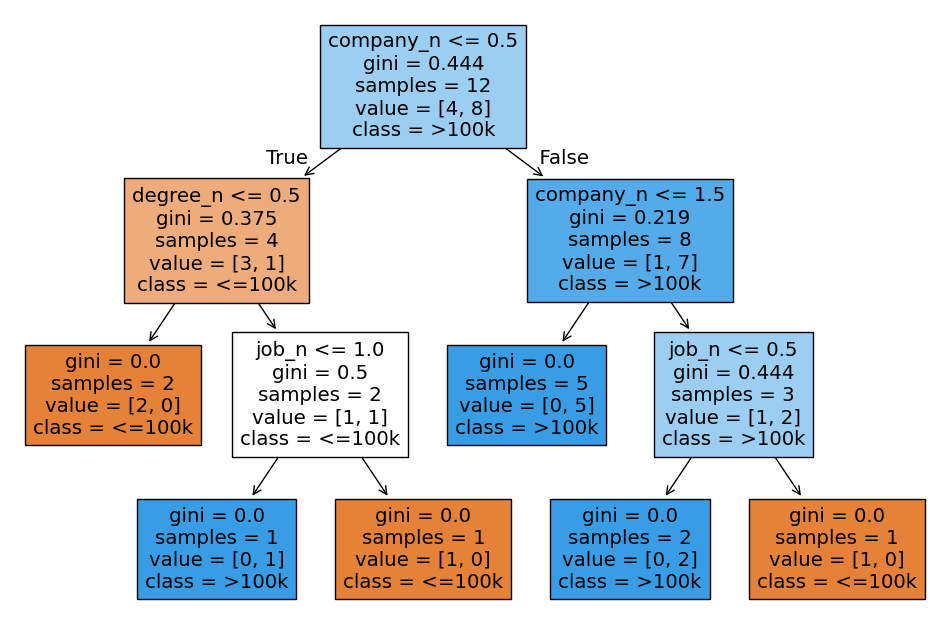

Predicted salary class: <=100k


In [41]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load your data
df = pd.read_csv('salaries.csv')

# 2. Encode text columns to numbers
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

df['company_n'] = le_company.fit_transform(df['company'])
df['job_n'] = le_job.fit_transform(df['job'])
df['degree_n'] = le_degree.fit_transform(df['degree'])

# 3. Select features (inputs) and target (output)
X = df[['company_n', 'job_n', 'degree_n']]
y = df['salary_more_then_100k']

# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Create and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 6. Test the model and print accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# 7. Show the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['company_n', 'job_n', 'degree_n'], class_names=['<=100k', '>100k'], filled=True)
plt.show()

# 8. Predict for new data (example: company_n=2, job_n=2, degree_n=1)
sample = pd.DataFrame([[2, 2, 1]], columns=['company_n', 'job_n', 'degree_n'])
prediction = model.predict(sample)
print("Predicted salary class:", '>100k' if prediction[0]==1 else '<=100k')


In [42]:
%config InlineBackend.figure_format = 'retina' 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

df = pd.read_csv('titanic.csv')

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
le_Age = LabelEncoder()
le_Sex = LabelEncoder()
le_fare = LabelEncoder()
df['Age_n'] = le_Age.fit_transform(df['Age'])
df['Sex_n'] = le_Sex.fit_transform(df['Sex'])
df['Fare_n'] = le_fare.fit_transform(df['Fare'])
X = df[['Pclass','Sex_n','Age_n','Fare_n']]
y = df['Survived']

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_n,Sex_n,Fare_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,28,1,18
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,0,207
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,34,0,41
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,47,0,189
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,47,1,43


In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [38]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [39]:
# 6. Test the model and print accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7988826815642458


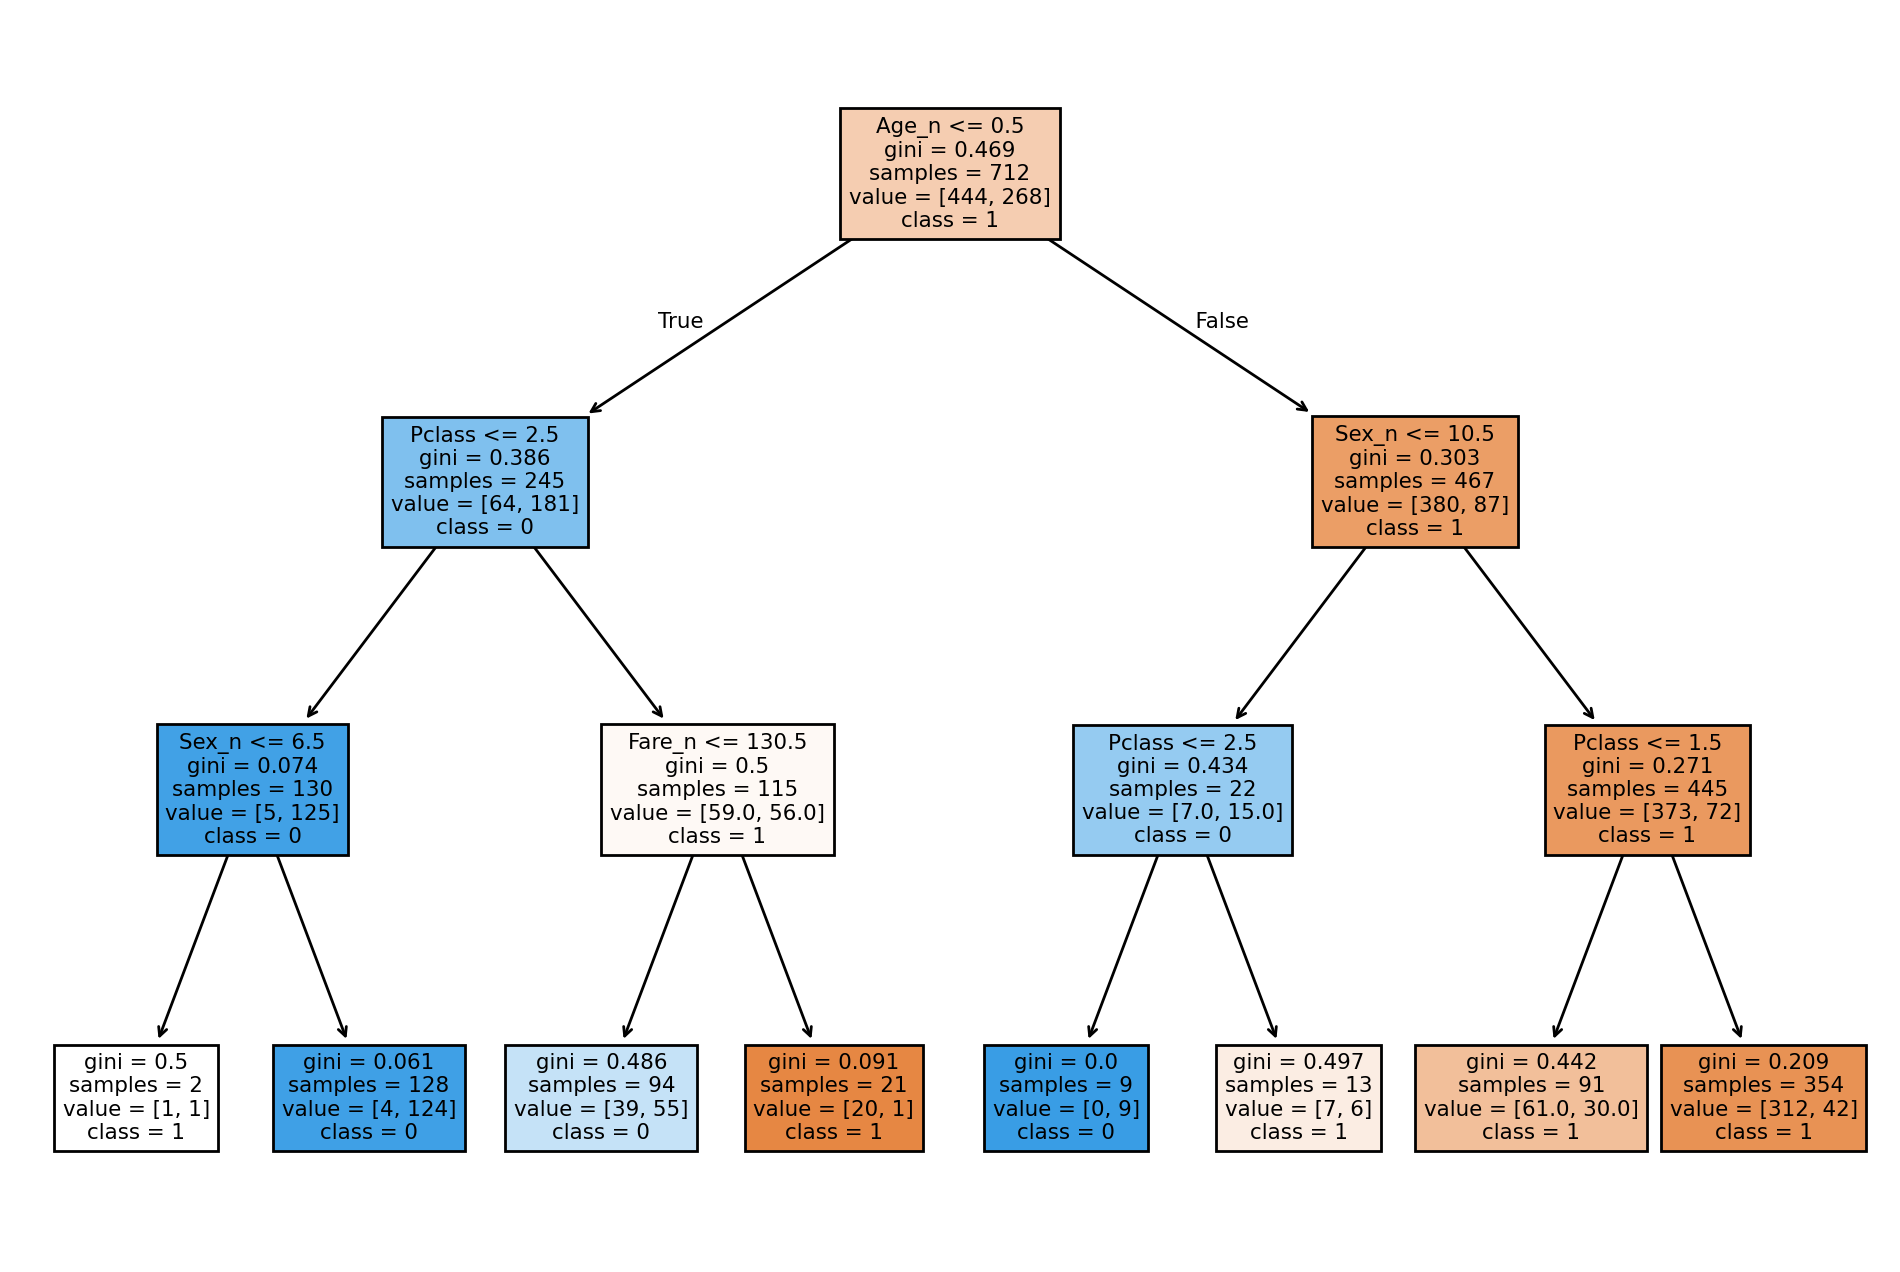

In [40]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['Pclass','Age_n', 'Sex_n', 'Fare_n'],class_names=['1', '0'], filled=True)
plt.savefig('myplot.png')
plt.show()

In [ ]:
# 8. Predict for new data 


| Mistake                          | Why it's a problem         | How to fix                         |
|-----------------------------------|----------------------------|------------------------------------|
| LabelEncoding numeric columns     | Not for continuous data    | Use as-is or bin if needed         |
| Not filling missing values        | Causes errors, unreliable model | Fill with median/mode         |
| Not using proper class names in plot | Hard to interpret        | Use descriptive names              |
| Using encoded columns for Age/Fare| Loses numeric meaning      | Use original numeric columns       |


Accuracy: 0.7412587412587412


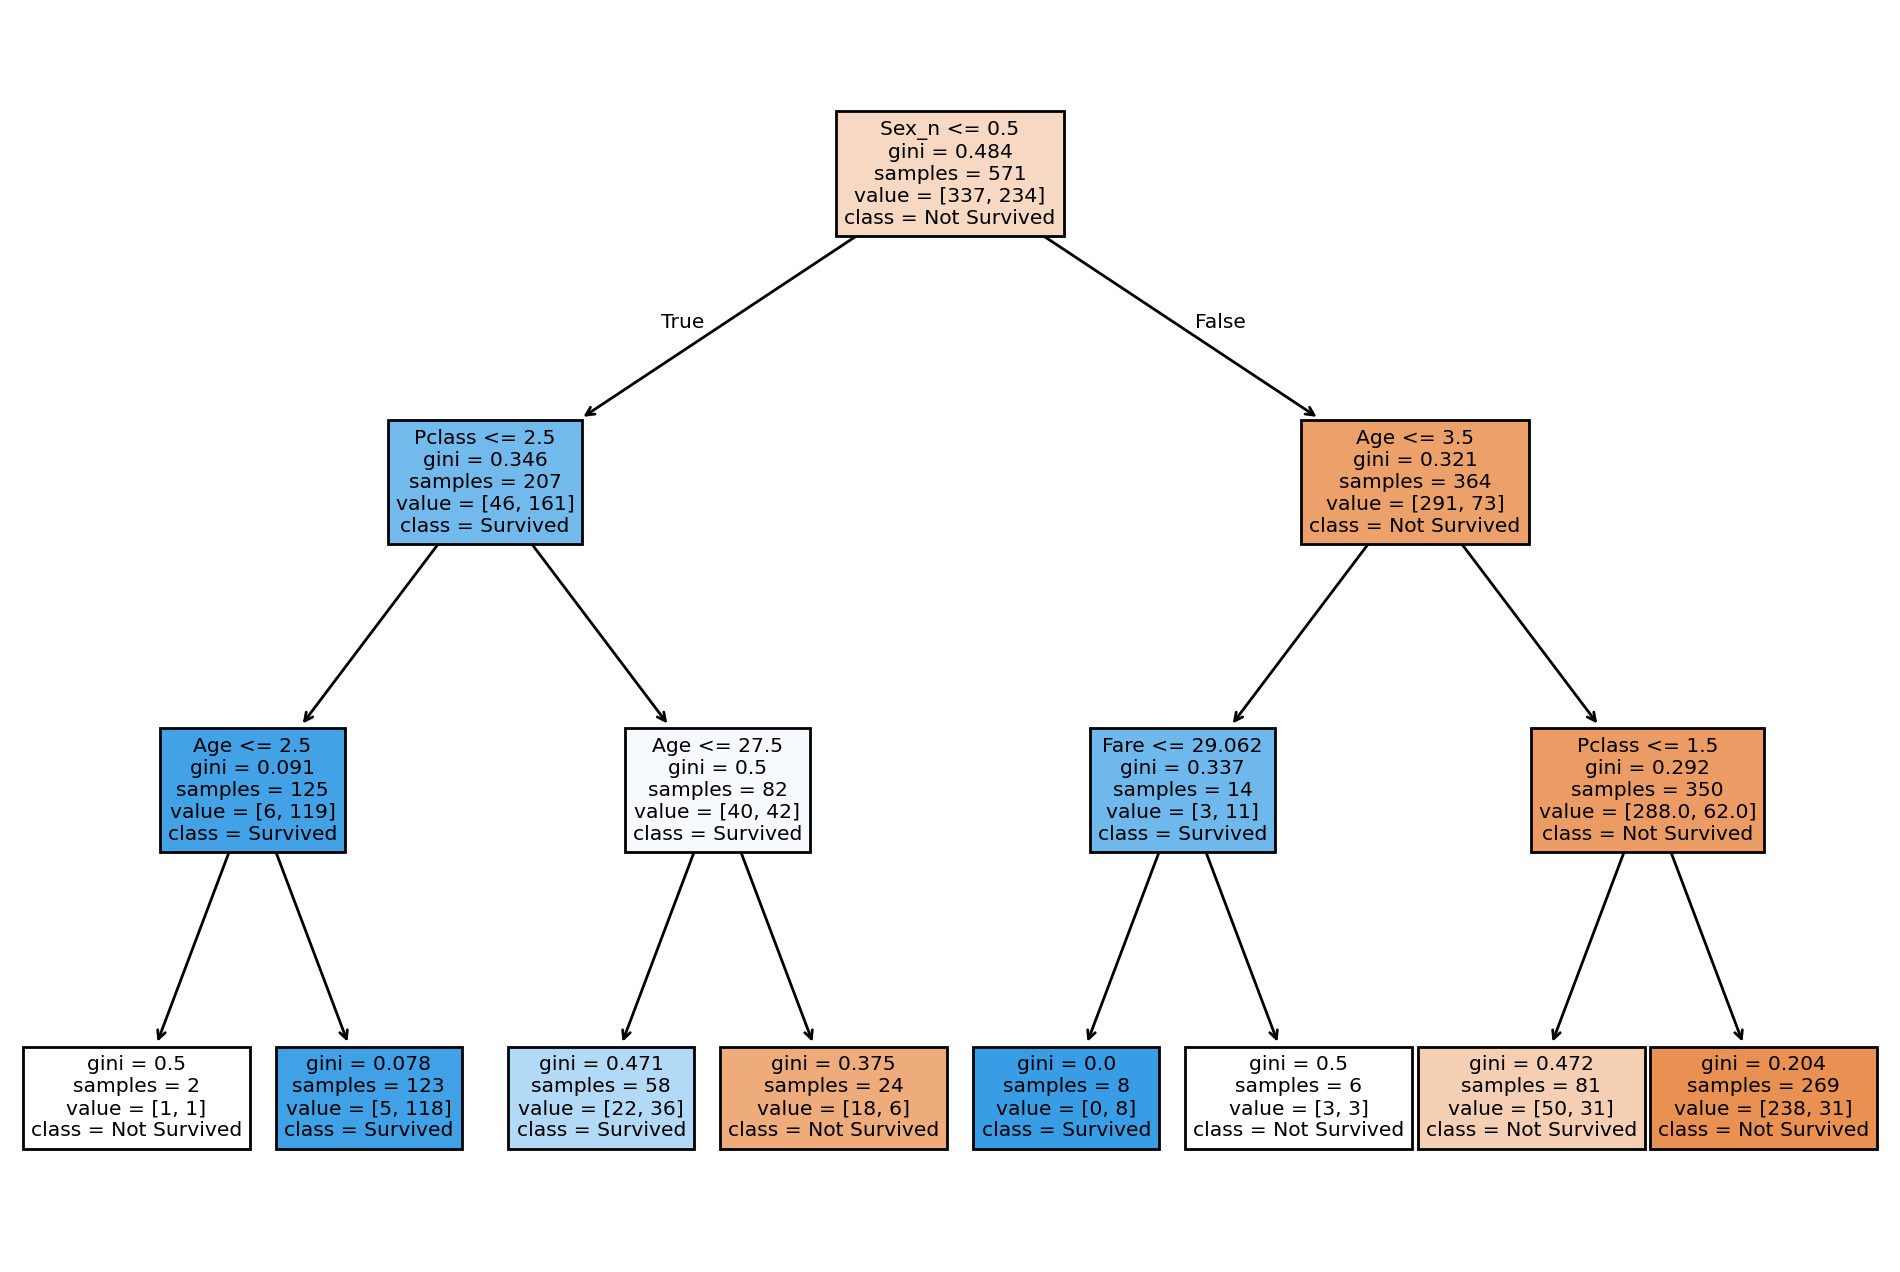

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load data
df = pd.read_csv('titanic.csv')

# Only drop rows where 'Age', 'Fare', or 'Sex' are missing
df = df.dropna(subset=['Age', 'Fare', 'Sex'])

# Fill missing values
# df['Age'] = df['Age'].fillna(df['Age'].median())
# df['Fare'] = df['Fare'].fillna(df['Fare'].median())
# df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])

# Encode categorical variables
le_Sex = LabelEncoder()
df['Sex_n'] = le_Sex.fit_transform(df['Sex'])


# Select features and target
X = df[['Pclass', 'Sex_n', 'Age', 'Fare']]
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot tree
plt.figure(figsize=(12, 8))
plot_tree(
    model,
    feature_names=['Pclass', 'Sex_n', 'Age', 'Fare'],
    class_names=['Not Survived', 'Survived'],
    filled=True
)
plt.savefig('myplot.png')
plt.show()


In [90]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [91]:
# predict
# Example input
pclass = 1
sex = 'male'
age = 26
fare = 30


# Encode sex
sex_n = le_Sex.transform([sex])[0]

# Prepare sample DataFrame
sample = pd.DataFrame([[pclass, sex_n, age, fare]], columns=['Pclass', 'Sex_n', 'Age', 'Fare'])

# Make prediction
prediction = model.predict(sample)
result = "Survived" if prediction[0] == 1 else "Not Survived"
print(f"Predicted outcome for Pclass={pclass}, Sex={sex}, Age={age}, Fare={fare}: {result}")


Predicted outcome for Pclass=1, Sex=male, Age=26, Fare=30: Not Survived


In [92]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_n
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q,0
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q,1
